In [1]:
import sys

In [2]:
N = 100

In [3]:
data = ["0", 0, 1e150, _, None, "Suddenly", [1, 2, 3, 4, 5]]
data_list_N = [[data for _ in range(N)] for data in data]
data_list_Nplus1 = [[data for _ in range(N+1)] for data in data]
data_list_2N = [[data for _ in range(2*N)] for data in data]
data_list_0N = [[] for data in data]

In [4]:
for d in data_list_0N:
    print(sys.getsizeof(d))
for d in data_list_N:
    print(sys.getsizeof(d))
for d in data_list_2N:
    print(sys.getsizeof(d))

56
56
56
56
56
56
56
920
920
920
920
920
920
920
1656
1656
1656
1656
1656
1656
1656


값의 자료형이 다름에도 데이터의 리스트는 크기가 같다.
1.  리스트 안에 값이 저장되는 것이 아니라, 리스트는 값을 참조한다.이 때, `getsizeof`는 객체의 크기까지 계산하지 않는다.
2. 빈 리스트는 56byte를 소모하며, N(100)개의 데이터 당 864바이트를 참조한다.
그런데, 100개의 데이터에 864바이트를 소모한 다는 것 자체가 이해가 가지 않는다. 혹시, 파이썬의 리스트는 사용자의 요청과 다르게, 더 큰 배열을 할당해 둔 것이 아닐까?

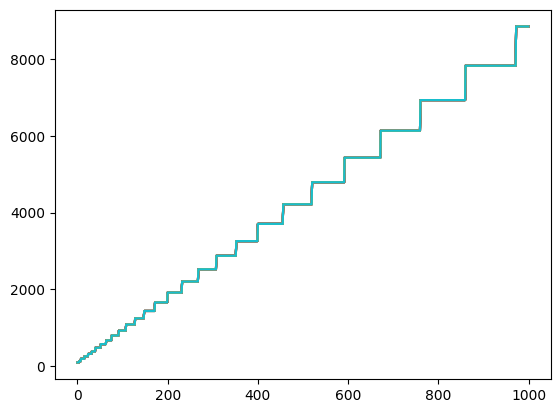

In [5]:
import matplotlib.pyplot as plt
for test_case in range(20):
    empty_list = []
    sizes = []
    for i in range(1000):
        empty_list.append(1)
        sizes.append(sys.getsizeof(empty_list))
    plt.plot(sizes)
plt.show()

1. 위의 그래프와 같이 파이썬의 리스트는 append 와 동시에 메모리의 크기를 늘리는 것이 아니라, 미리 메모리를 할당해두고, 필요 시 메모리를 추가 요청한다.
2. 한 데이터당 평균적으로 8byte를 소모하고 있음을 알 수 있는데, 64비트 시스템에서는 메모리 주소를 표현하기 위해 64비트(즉, 8바이트)가 필요하기 때문이다. Python과 같은 프로그래밍 언어에서는 각 객체를 메모리 상의 위치로 참조한다. 64비트 시스템에서 객체의 메모리 주소를 저장하고 참조하는 데에는 64비트, 즉 8바이트가 필요하다. 따라서, 이러한 시스템에서 Python 객체 참조의 크기는 일반적으로 8바이트로 간주된다.
3. 20회 반북 수행함에도 그래프가 동일한 것을 볼 수 있는데, deterministic한가 보다....(별도 확인 X)

In [6]:
for datum in data:
    print(datum,type(datum), "\t\t\t\t", sys.getsizeof(datum))

0 <class 'str'> 				 50
0 <class 'int'> 				 24
1e+150 <class 'float'> 				 24
 <class 'str'> 				 49
None <class 'NoneType'> 				 16
Suddenly <class 'str'> 				 57
[1, 2, 3, 4, 5] <class 'list'> 				 120


1. "0"의 크기가 int 0보다 크다. 
2. 1e+150이 float이다. float의 크기는 3.4E+/-38(7개의 자릿수)로 알고 있는데, 어떻게 된 것일까
3. 24 또한 0과 같이 int인데, 4바이트의 크기를 더 소모한다.
4. 8자 크기의 "Suddenly"는 "0"과 비교해도 7 byte의 크기만 차이가 난다. 혹시, '0'과 "0"의 크기가 다른가?
5. 빈 배열 16byte와, 8*5를 합해 66byte로 추정하였으나, 120byte이다. 배열의 크기를 8까지 미리 할당해 둔 듯 하다.
위 5가지를 확인해보자


## "0", '0'의 크기는 같다.

In [7]:
print(sys.getsizeof('0'))
print(sys.getsizeof("0"))
print(sys.getsizeof(b'a'))

50
50
34


GPT Answer.
Python에서 정수는 객체로 구현되어 있어, 값 외에 참조 카운트와 메타데이터를 포함하기 때문에 24~28바이트의 메모리를 사용합니다. 
Python은 char 타입을 따로 제공하지 않으며, 모든 문자는 유니코드를 지원하는 str 객체로 표현되어 메모리 사용이 더 큽니다. 
단일 문자를 메모리 효율적으로 저장하고자 할 때는 바이트 타입을 사용할 수 있지만, 이는 문자열의 모든 기능을 지원하지 않습니다.

In [11]:
print(sys.getsizeof(0), type(0))
print(sys.getsizeof(0), type(0))
print(sys.getsizeof(-1), type(-1))
print(sys.getsizeof(1e0), type(1e0))
print(sys.getsizeof(5), type(5))
print(sys.getsizeof(5+24), type(5+24))
print(sys.getsizeof(1e4), type(1e4))
print(sys.getsizeof(10000), type(10000))
print(sys.getsizeof(300), type(300))
print(sys.getsizeof(3e2), type(3e2))


24 <class 'int'>
24 <class 'int'>
28 <class 'int'>
24 <class 'float'>
28 <class 'int'>
28 <class 'int'>
24 <class 'float'>
28 <class 'int'>
28 <class 'int'>
24 <class 'float'>


Python에서 정수의 메모리 사용량이 값에 따라 다를 수 있는 주된 이유는 Python의 정수가 객체로 구현되어 있고, 특정 범위 내의 작은 정수들에 대해서는 인터프리터가 사전에 생성한 객체를 재사용하기 때문입니다. 이런 최적화 기법을 "정수 인터닝(Integer Interning)"이라고 합니다. 
정수 인터닝은 Python 인터프리터가 메모리 사용을 줄이고 성능을 향상시키기 위해 -5부터 256까지의 정수 객체를 미리 생성하고, 이 범위 내의 정수에 대한 참조가 필요할 때마다 재사용하는 메커니즘을 말합니다.


파이썬 버전별로 int 0의 크기 차이
Python3.7, 3.9, 3.10 : 24
Python3.11 : 28
